<a href="https://colab.research.google.com/github/g23ai2068/Capstone-Project/blob/main/Phase_2_Data_Ingestion_and_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
Reviews = pd.read_csv('/content/drive/MyDrive/AirBNB/reviews.csv')

In [ ]:
Reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [ ]:
 Reviews.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,3
comments,70


In [ ]:
Reviews.shape

(392959, 6)

In [ ]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392959 entries, 0 to 392958
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     392959 non-null  int64 
 1   id             392959 non-null  int64 
 2   date           392959 non-null  object
 3   reviewer_id    392959 non-null  int64 
 4   reviewer_name  392956 non-null  object
 5   comments       392889 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.0+ MB


In [ ]:
Reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,392959.0,8.225927e+16,2.459846e+17,958.0,4359078.0,17421876.0,3.680482e+07,1.234137e+18
id,392959.0,4.223165e+17,4.557533e+17,1981.0,279133028.0,770142635.0,8.646046e+17,1.237913e+18
reviewer_id,392959.0,1.251442e+08,1.407015e+08,1.0,19924585.0,66633712.0,1.818866e+08,5.984690e+08


In [ ]:
Reviews.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,3
comments,70


In [ ]:
Reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
Reviews['id'].duplicated().sum()

54

In [ ]:
Reviews1=Reviews.drop_duplicates(['id'], keep='first')

In [ ]:
Reviews1.shape

(392905, 6)

In [ ]:
Reviews1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...


In [ ]:
pip install nltk

In [ ]:
# Importing all the dependencies for nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Using vader, we are importing sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Load the sentiment analyzer
sent = SentimentIntensityAnalyzer()
Reviews_final = pd.read_csv('/content/drive/MyDrive/AirBNB/reviews.csv', usecols=['comments'])
Reviews_final['comments'] = Reviews_final['comments'].astype(str)

# Calculate polarity scores
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in Reviews_final['comments']]
Reviews_final['sentiment_score'] = polarity
Reviews_final.head()

,comments,sentiment_score
0,"Our experience was, without a doubt, a five st...",0.96
1,Returning to San Francisco is a rejuvenating t...,0.98
2,We were very pleased with the accommodations a...,0.76
3,We highly recommend this accomodation and agre...,0.98
4,Holly's place was great. It was exactly what I...,0.96


In [ ]:
review_total = pd.merge(Reviews1, Reviews_final, on='comments', how='inner')
review_total

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",0.96
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,0.98
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,0.76
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,0.98
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...,0.96
...,...,...,...,...,...,...,...
1218756,1233574822709070023,1237138800668239871,2024-09-02,541938241,Dave,Wonderful,0.57
1218757,1233574822709070023,1237138800668239871,2024-09-02,541938241,Dave,Wonderful,0.57
1218758,1233574822709070023,1237138800668239871,2024-09-02,541938241,Dave,Wonderful,0.57
1218759,1233574822709070023,1237138800668239871,2024-09-02,541938241,Dave,Wonderful,0.57


In [ ]:
review_total.shape

(1218761, 7)

In [ ]:
review_total.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,3
comments,0
sentiment_score,0


In [ ]:
review_total['id'].duplicated().sum()

825926

In [ ]:
review_total1=review_total.drop_duplicates(['id'], keep='first')

In [ ]:
review_total1.shape

(392835, 7)

In [ ]:
review_total1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",0.96
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,0.98
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,0.76
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,0.98
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...,0.96


In [ ]:
review_total1.listing_id.unique()

array([                958,                5858,                8142, ...,
       1219785829994931401, 1233574822709070023, 1234136833991870838])

In [ ]:
review_total1.listing_id.mean()

8.210841933807726e+16

In [ ]:
review_total.comments.value_counts()

,count
comments,
Great place!,133956
Great stay!,102720
.,101124
Great place,63001
Great location!,56169
...,...
"Amazing stay, everything was perfect!",1
Katie’s place was exactly what I was looking for. The location was convenient and easy to find. Would definitely stay here again.,1
"Katie is a fantastic host! Super friendly and responsive, with great local tips. Her place is very clean with a fantastic view of the Mission District. I would definitely stay again!",1


In [ ]:
review_total.to_csv('review_total.csv', index=False)

## Visualize the sentiment distribution

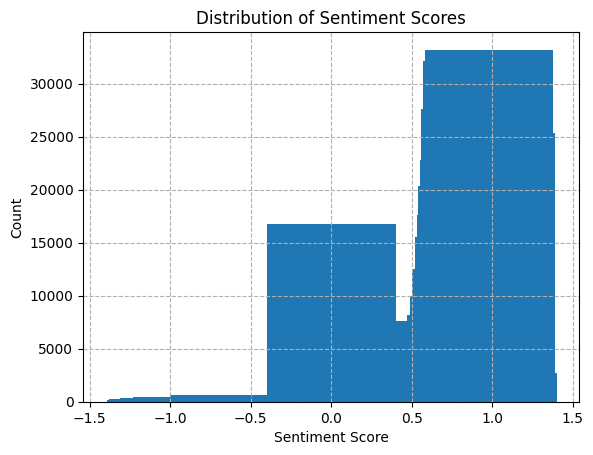

In [ ]:
sentiment_counts=review_total1['sentiment_score'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Scores')
plt.grid(linestyle='--')
plt.show()

In [ ]:
!pip install Faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.5 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import pandas as pd
import random
import numpy as np

# Initialize Faker
fake = Faker()

# Predefined templates for comments with placeholders logically aligned
comment_templates = [
    "The stay at this property was {}! The host provided {} service, and the amenities were {}.",
    "I {} recommend this place. The experience was {} and the location was {}.",
    "This accommodation was {}. The host was {}, and everything was {}.",
    "We had a {} time here. The property was {} and exceeded our expectations!",
    "The place was {} and the staff was {}. Overall, we {} our stay."
]

# Logical sets of words for placeholders
adjectives_overall = ["fantastic", "great", "wonderful", "average", "terrible", "awesome", "mediocre"]
adjectives_service = ["excellent", "poor", "outstanding", "subpar", "amazing", "good", "bad"]
adjectives_amenities = ["memorable", "disappointing", "delightful", "okay", "forgettable", "perfect"]
recommendation_phrases = ["highly", "partially", "would not", "definitely", "strongly"]
overall_sentiment = ["enjoyed", "disliked", "loved", "hated"]

# Set the number of rows you want to generate
num_rows = 1000

# Generate synthetic data
data = {
    "listing_id": (8.210841933807726e+16),
    "id": [random.randint(5000, 30000) for _ in range(num_rows)],
    "date": [fake.date_between(start_date='-10y', end_date='today') for _ in range(num_rows)],
    "reviewer_id": [random.randint(10000, 40000) for _ in range(num_rows)],
    "reviewer_name": [fake.name() for _ in range(num_rows)],
    "comments": [
        random.choice(comment_templates).format(
            random.choice(adjectives_overall),
            random.choice(adjectives_service),
            random.choice(adjectives_amenities) if "{}" in random.choice(comment_templates) else random.choice(overall_sentiment)
        )
        for _ in range(num_rows)
    ],
    "sentiment_score": [round(random.uniform(0.5, 1.0), 2) for _ in range(num_rows)]
}

# Convert to a Pandas DataFrame
synthetic_data = pd.DataFrame(data)

# Display the first few rows
print(synthetic_data.head())

# Save to a CSV file if needed
synthetic_data.to_csv("synthetic_reviews.csv", index=False)


     listing_id     id        date  reviewer_id   reviewer_name  \
0  8.210842e+16  12197  2024-10-17        30427   Robert Torres   
1  8.210842e+16  22788  2023-09-16        27120     Sarah Smith   
2  8.210842e+16  18457  2015-09-27        29868    Amy Reynolds   
3  8.210842e+16  29407  2018-04-24        37601  Cassidy Durham   
4  8.210842e+16  15866  2016-06-26        26197    Mark Schultz   

                                            comments  sentiment_score  
0  The place was average and the staff was amazin...             0.86  
1  I terrible recommend this place. The experienc...             0.52  
2  I awesome recommend this place. The experience...             0.99  
3  The stay at this property was terrible! The ho...             0.53  
4  This accommodation was awesome. The host was p...             0.94  


In [ ]:
synthetic_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,8.210842e+16,12197,2024-10-17,30427,Robert Torres,The place was average and the staff was amazin...,0.86
1,8.210842e+16,22788,2023-09-16,27120,Sarah Smith,I terrible recommend this place. The experienc...,0.52
2,8.210842e+16,18457,2015-09-27,29868,Amy Reynolds,I awesome recommend this place. The experience...,0.99
3,8.210842e+16,29407,2018-04-24,37601,Cassidy Durham,The stay at this property was terrible! The ho...,0.53
4,8.210842e+16,15866,2016-06-26,26197,Mark Schultz,This accommodation was awesome. The host was p...,0.94


In [ ]:
synthetic_data.shape

(1000, 7)

In [ ]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   listing_id       1000 non-null   float64
 1   id               1000 non-null   int64  
 2   date             1000 non-null   object 
 3   reviewer_id      1000 non-null   int64  
 4   reviewer_name    1000 non-null   object 
 5   comments         1000 non-null   object 
 6   sentiment_score  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [ ]:
final_reviews=pd.concat([review_total1,synthetic_data])

In [ ]:
final_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393835 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   listing_id       393835 non-null  float64
 1   id               393835 non-null  int64  
 2   date             393835 non-null  object 
 3   reviewer_id      393835 non-null  int64  
 4   reviewer_name    393832 non-null  object 
 5   comments         393835 non-null  object 
 6   sentiment_score  393835 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 24.0+ MB


## Ingesting  data into SQLite

In [ ]:
import sqlite3

# Create a connection to the SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect('airbnb_data.db')
cursor = conn.cursor()

print("SQLite Database connected!")


SQLite Database connected!


In [ ]:
# Create the 'reviews' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS reviews (
    listing_id INTEGER,
    id INTEGER PRIMARY KEY,
    date TEXT,
    reviewer_id INTEGER,
    reviewer_name TEXT,
    comments TEXT
)
""")

conn.commit()  # Save changes
print("Tables created!")

Tables created!


In [ ]:
import pandas as pd

# Load CSV files
#reviews = pd.read_csv('/path/to/reviews.csv')

# Insert data into the SQLite database
final_reviews.to_sql('final_reviews', conn, if_exists='append', index=False)

print("Data ingested successfully!")

Data ingested successfully!


In [ ]:
# Query the 'reviews' table
cursor.execute("SELECT * FROM final_reviews LIMIT 5")
rows = cursor.fetchall()
for row in rows:
    print(row)


(958.0, 5977, '2009-07-23', 15695, 'Edmund C', "Our experience was, without a doubt, a five star experience. Holly and her husband, David, were the consummate hosts; friendly and accomodating while still honoring our privacy. The apartment was a charming layout with a full view and access to the home's garden The location is perfect for full engagement with the city; close to mass transit with walking proximity to the Haight, the Mission, the Castro and Golden Gate Park. I can't wait for our next visit.\r<br/>\r<br/>Ted and Karen Wingerd", 0.96)
(958.0, 6660, '2009-08-03', 26145, 'Simon', "Returning to San Francisco is a rejuvenating thrill but this time it was enhanced by our stay at Holly and David's beautifully renovated and perfectly located apartment. You do not need a car to enjoy the City as everything is within walking distance - great restaurants, bars and local stores. With such amenable hosts and a place to stay that enhances one's holiday, we will be returning again and aga

In [ ]:
cursor.execute("SELECT * FROM final_reviews")
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print(row)


Streaming output truncated to the last 5000 lines.
(1.0469194877544982e+18, 1103033281306693472, '2024-03-01', 497502097, 'James', 'Staying with Ari was great!', 0.66)
(1.0474564050481983e+18, 1067531579508462403, '2024-01-12', 58349189, 'Jeremy', 'We had a good stay after a few teething problems. The place is obviously new and has just been renovated but there were some things that had been rushed. The main bed only had 3 slats on it and my colleague ended up sleeping on the floor in the first night as the mattress was sinking into the bed. This was quickly fixed by the host and I’m guessing their handyman just rushed things.<br/>The place is fresh and clean inside, the floor is somewhat sloping in various places and we found a few nails poking out of the floor. <br/>The bathroom was clean and tidy.<br/>The stairs to get up to the rental are not for the faint hearted as they are very steep and hard to navigate with a suitcase. <br/>Inside the place is quiet and there isn’t any street 

In [ ]:
cursor.execute("SELECT listing_id, id FROM final_reviews LIMIT 10")
rows = cursor.fetchall()

for row in rows:
    print(row)


(958.0, 5977)
(958.0, 6660)
(958.0, 11519)
(958.0, 16282)
(958.0, 26008)
(958.0, 29240)
(958.0, 32988)
(958.0, 220443)
(958.0, 567690)
(958.0, 1786860)


In [ ]:
conn.close()
print("SQLite Database connection closed!")


SQLite Database connection closed!


In [ ]:
conn = sqlite3.connect('airbnb_data.db')
cursor = conn.cursor()

print("SQLite Database connected!")

SQLite Database connected!


##View Data with Pandas

In [ ]:
import pandas as pd

# Fetch data into a Pandas DataFrame
query = "SELECT * FROM final_reviews LIMIT 10"  # Fetch the first 10 rows
final_reviews = pd.read_sql_query(query, conn)

# Display the DataFrame
print(final_reviews)


   listing_id       id        date  reviewer_id reviewer_name  \
0       958.0     5977  2009-07-23        15695      Edmund C   
1       958.0     6660  2009-08-03        26145         Simon   
2       958.0    11519  2009-09-27        25839         Denis   
3       958.0    16282  2009-11-05        33750          Anna   
4       958.0    26008  2010-02-13        15416     V Jillian   
5       958.0    29240  2010-03-13        78623       Mathieu   
6       958.0    32988  2010-04-03        96027        Lauren   
7       958.0   220443  2011-04-08       426888      Michelle   
8       958.0   567690  2011-09-26       539189         Sarah   
9       958.0  1786860  2012-07-24      2059845          Jörg   

                                            comments  sentiment_score  
0  Our experience was, without a doubt, a five st...             0.96  
1  Returning to San Francisco is a rejuvenating t...             0.98  
2  We were very pleased with the accommodations a...             0.7

In [ ]:
import os

print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
conn = sqlite3.connect('airbnb_data.db')

In [ ]:
import sqlite3
import pandas as pd

# Example: Export calendar data to a new SQLite database
conn = sqlite3.connect('new_airbnb_data.db')
#calendar_df = pd.read_csv('/path/to/calendar.csv')  # Reload your data if needed
final_reviews.to_sql('final_reviews', conn, if_exists='replace', index=False)

print("New database created: new_airbnb_data.db")


New database created: new_airbnb_data.db


In [ ]:
import os

print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
!pip install google-cloud-bigquery pandas


In [ ]:
from google.cloud import bigquery

# Explicitly set the path to the service account file
client = bigquery.Client.from_service_account_json('/content/data-pipeline-project-439916-d1819b5c61d3.json')

# Now, you can use the BigQuery client to interact with BigQuery


In [ ]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('new_airbnb_data.db')

# Query the SQLite database
reviews_df = pd.read_sql_query("SELECT * FROM final_reviews", conn)

# Display the data (optional)
print(reviews_df.head())

# Close the connection
conn.close()


   listing_id     id        date  reviewer_id reviewer_name  \
0       958.0   5977  2009-07-23        15695      Edmund C   
1       958.0   6660  2009-08-03        26145         Simon   
2       958.0  11519  2009-09-27        25839         Denis   
3       958.0  16282  2009-11-05        33750          Anna   
4       958.0  26008  2010-02-13        15416     V Jillian   

                                            comments  sentiment_score  
0  Our experience was, without a doubt, a five st...             0.96  
1  Returning to San Francisco is a rejuvenating t...             0.98  
2  We were very pleased with the accommodations a...             0.76  
3  We highly recommend this accomodation and agre...             0.98  
4  Holly's place was great. It was exactly what I...             0.96  


In [ ]:
from google.cloud import bigquery
from google.cloud.exceptions import NotFound # Importing the NotFound exception

# Initialize BigQuery client
client = bigquery.Client.from_service_account_json('/content/data-pipeline-project-439916-d1819b5c61d3.json')

# Specify the dataset and table names
dataset_id = 'new_airbnb_data'
table_id = 'reviews'

# Create the dataset if it doesn't exist
dataset_ref = client.dataset(dataset_id)
try:
    client.get_dataset(dataset_ref)  # Check if dataset exists
    print(f"Dataset {dataset_id} already exists.")
except NotFound: # Handling the NotFound exception
    dataset = bigquery.Dataset(dataset_ref)
    dataset = client.create_dataset(dataset)  # Create the dataset
    print(f"Dataset {dataset_id} created.")

# Upload the DataFrame to BigQuery
job = client.load_table_from_dataframe(reviews_df, f"{dataset_id}.{table_id}")

# Wait for the job to complete
job.result()

print(f"Data loaded into BigQuery table {dataset_id}.{table_id} successfully!")

Dataset new_airbnb_data created.
Data loaded into BigQuery table new_airbnb_data.reviews successfully!
